## Programming Exercise 5

### Setup
This loads the required modules. No other modules are necessary to successfully finish this exercise.

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

### 5.1 Linear Filtering

#### 5.1.1

Perform a linear filtering operation of the image signal $x$ with the 1D filter $h$ using scipy's `signal.convolve2d` ([docs](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html#scipy.signal.convolve2d)) function. Ensure that the filtered image has the same size as the input image.

$ x[m,n] = \begin{bmatrix} 10 & 10 & 20 & 20 \\ 10 & 10 & 20 & 20 \\ 10 & 10 & 30 & 30 \\ 5 & 5 & 40 & 40 \end{bmatrix}$

$ h[m,n] = \frac{1}{4} \cdot \begin{bmatrix} 1 & 2 & 1 \end{bmatrix}$

Display the original and filtered image.

[[10. 10. 20. 20.]
 [10. 10. 20. 20.]
 [10. 10. 30. 30.]
 [ 5.  5. 40. 40.]]
[[ 7.5  12.5  17.5  15.  ]
 [ 7.5  12.5  17.5  15.  ]
 [ 7.5  15.   25.   22.5 ]
 [ 3.75 13.75 31.25 30.  ]]


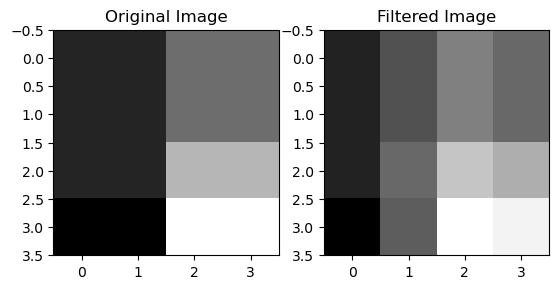

In [3]:
x=np.zeros((4,4))
x[:3,:2],x[:2,2:],x[2,2:],x[3,2:],x[3,:2]=10,20,30,40,5
h=0.25*np.array([1,2,1]).reshape(1,3)
filtered_image_scipy=signal.convolve2d(x,h,mode='same')
print(x)
print(filtered_image_scipy)
plt.subplot(1,2,1)
plt.imshow(x,cmap='gray')
plt.title("Original Image")
plt.subplot(1,2,2)
plt.imshow(filtered_image_scipy,cmap='gray')
plt.title("Filtered Image")
plt.show()

#### 5.1.2

Implement a function `filter_image_1d(image, filter_response)` that filters the image with the given 1D filter response without using a pre-implemented filtering or convolution function. The filter is non-causal, i.e., the center of the filter is in the middle. Hints:
* Create an empty `image_filtered` with the same size as `image` for the output.
* Calculate the filtered value for each pixel in `image_filtered` as $ y[m,n] = x[m,n] * h[n] $, where $y$ is the filtered image, $x$ is the input image, $h$ is the filter response and $*$ is the convolution operation.
* Ignore pixels at the horizontal boundaries of the filtered image for now.
* Be careful to take the non-causality of the filter into account.

Use your function to filter $x$ with $h$ as defined in 4.1.1. Display the original and filtered image. Compare your result to the result in 4.1.1.

[[10. 10. 20. 20.]
 [10. 10. 20. 20.]
 [10. 10. 30. 30.]
 [ 5.  5. 40. 40.]]
[[ 0.   12.5  17.5   0.  ]
 [ 0.   12.5  17.5   0.  ]
 [ 0.   15.   25.    0.  ]
 [ 0.   13.75 31.25  0.  ]]


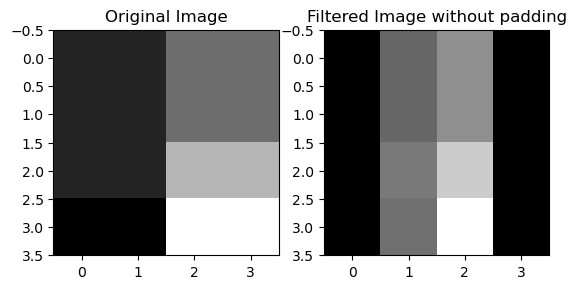

In [ ]:
def filter_image_1d(image,filter_response):
    image_filtered=np.zeros(image.shape,dtype=np.float64)
    filter_radius=filter_response.size//2
    for i in range(image.shape[0]):
        for j in range(filter_radius,image.shape[1]-filter_radius):
            image_filtered[i,j]+=np.sum(filter_response * image[i, j - filter_radius:j + filter_radius + 1])
    return image_filtered


x=np.zeros((4,4))
x[:3,:2],x[:2,2:],x[2,2:],x[3,2:],x[3,:2]=10,20,30,40,5
h=0.25*np.array([1,2,1])
#filtered_image=filter_image_1d(x,h)
filtered_image_1=filter_image_1d(x,h)
print(x)
print(filtered_image_1)
plt.subplot(1,2,1)
plt.imshow(x,cmap='gray')
plt.title("Original Image")
plt.subplot(1,2,2)
plt.imshow(filtered_image_1,cmap='gray')
plt.title("Filtered Image without padding")
plt.show()


#### 5.1.3

To allow filtering at the horizontal border of the image and support arbitrary filter lengths, the image needs to be padded horizontally. Copy the `filter_image` function from 4.1.2 and extend it with a padding of the input image based on the length of the filter using `np.pad` ([docs](https://numpy.org/doc/stable/reference/generated/numpy.pad.html)). Ensure to pad as few values as possible to minimize the memory requirements of your code!

*Attention: You'll need to update the filtering to account for the additional padding.*

True


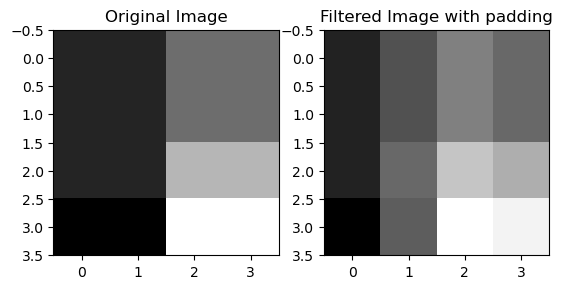

In [30]:
def filter_image_1d(image,filter_response):
    image_filtered=np.zeros(image.shape,dtype=np.float64)
    filter_radius=filter_response.size//2
    padded_image = np.pad(image, ((0, 0), (filter_radius, filter_radius)))
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            image_filtered[i,j]+=np.sum(filter_response * padded_image[i, j :j + filter_response.size])
    return image_filtered
x=np.zeros((4,4))
x[:3,:2],x[:2,2:],x[2,2:],x[3,2:],x[3,:2]=10,20,30,40,5
h=0.25*np.array([1,2,1])
filtered_image=filter_image_1d(x,h)
print(np.all(filtered_image==filtered_image_scipy))
plt.subplot(1,2,1)
plt.imshow(x,cmap='gray')
plt.title("Original Image")
plt.subplot(1,2,2)
plt.imshow(filtered_image,cmap='gray')
plt.title("Filtered Image with padding")
plt.show()

#### 5.1.4

Extend the definition of the function `filter_image` to allow the specification of a padding mode for `np.pad`. Filter the image using the following padding modes and display the results:
* constant
* edge
* reflect
* symmetric

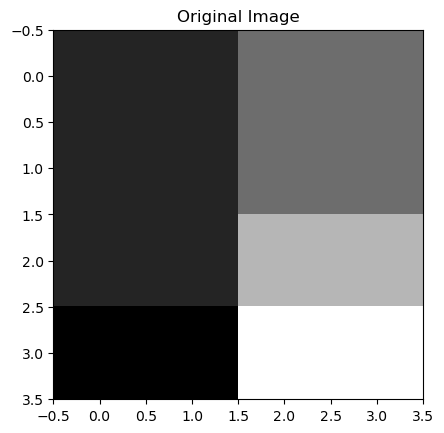

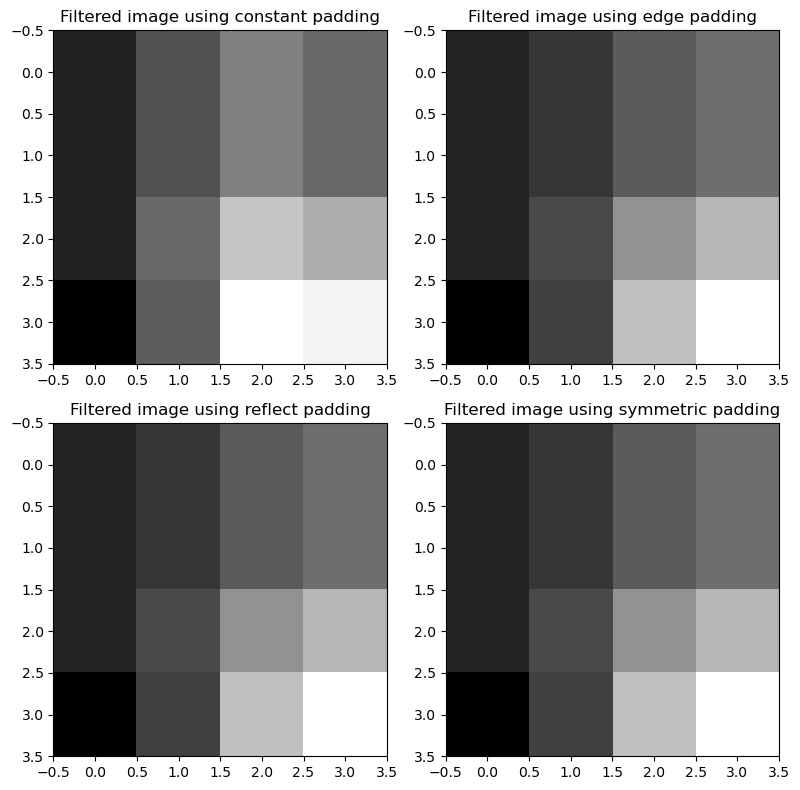

In [6]:
def filter_image_1d(image,filter_response,mod='edge'):
    image_filtered=np.zeros(image.shape,dtype=np.float64)
    filter_radius=filter_response.size//2
    padded_image = np.pad(image, ((0, 0), (filter_radius, filter_radius)), mode=mod)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            image_filtered[i,j]+=np.sum(filter_response * padded_image[i, j :j + filter_response.size])
    return image_filtered
x=np.zeros((4,4))
x[:3,:2],x[:2,2:],x[2,2:],x[3,2:],x[3,:2]=10,20,30,40,5
h=0.25*np.array([1,2,1])
filtered_image_constant=filter_image_1d(x,h,'constant')
filtered_image_edge=filter_image_1d(x,h,'edge')
filtered_image_reflect=filter_image_1d(x,h,'reflect')
filtered_image_symmetric=filter_image_1d(x,h,'symmetric')
plt.imshow(x,cmap='gray')
plt.title("Original Image")
plt.show()
fig,ax=plt.subplots(2,2,figsize=(8,8))
ax[0,0].imshow(filtered_image_constant,cmap='gray')
ax[0,0].set_title("Filtered image using constant padding")
ax[0,1].imshow(filtered_image_edge,cmap='gray')
ax[0,1].set_title("Filtered image using edge padding")
ax[1,0].imshow(filtered_image_reflect,cmap='gray')
ax[1,0].set_title("Filtered image using reflect padding")
ax[1,1].imshow(filtered_image_symmetric,cmap='gray')
ax[1,1].set_title("Filtered image using symmetric padding")
plt.tight_layout()
plt.show()